# Task 5: Decision Trees and Random Forests

## Objective
To learn tree-based models for classification and understand ensemble learning techniques.

## Tools Used
- Python
- Scikit-learn
- Matplotlib
- Seaborn


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Dataset Overview

The Heart Disease dataset is used for binary classification.
Target variable indicates presence (1) or absence (0) of heart disease.


In [3]:
X = df.drop("target", axis=1)
y = df["target"]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [5]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


In [6]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## Decision Tree Performance

The Decision Tree model was trained and evaluated using accuracy and classification metrics.


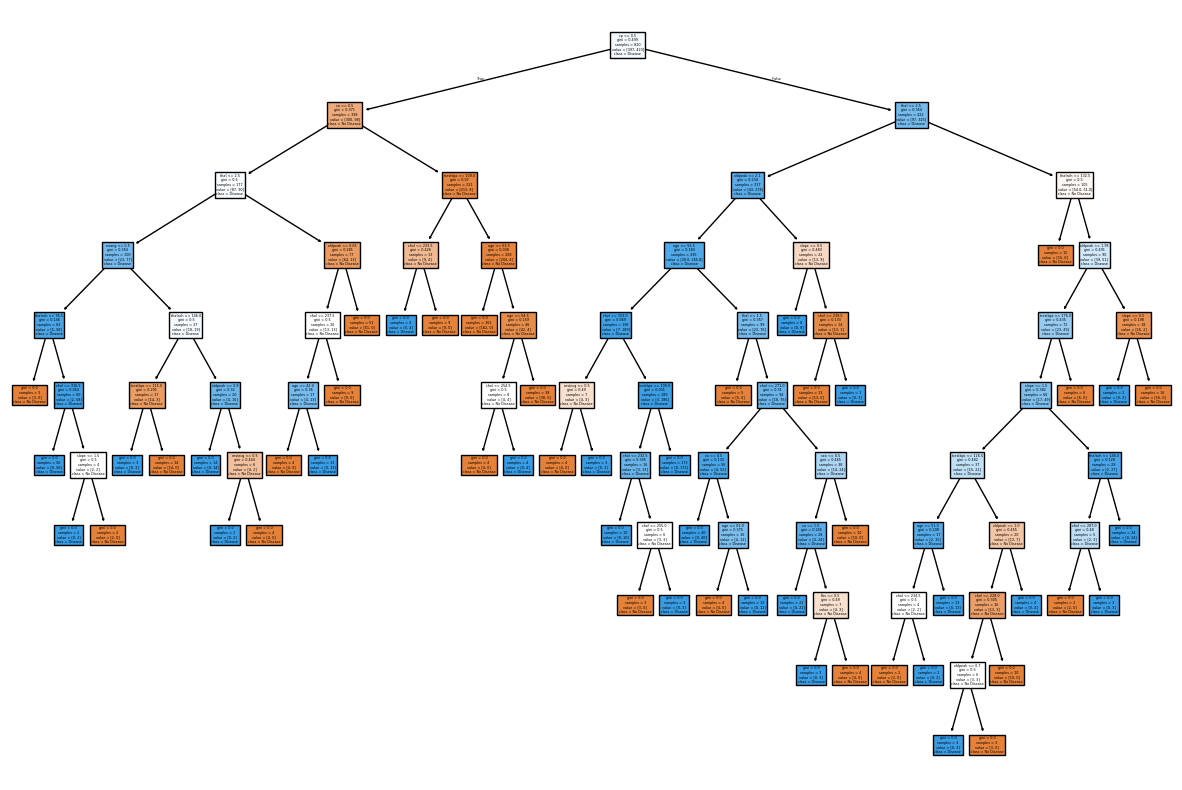

In [7]:
plt.figure(figsize=(15,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease","Disease"], filled=True)
plt.show()


## Decision Tree Visualization

The tree splits features based on criteria such as Gini impurity to classify samples.


In [8]:
dt_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_limited.fit(X_train, y_train)

print("Limited Depth Accuracy:", accuracy_score(y_test, dt_limited.predict(X_test)))


Limited Depth Accuracy: 0.7804878048780488


## Overfitting Analysis

A fully grown tree may overfit the training data.
Limiting tree depth helps improve generalization.


In [9]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


In [10]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


## Random Forest Performance

Random Forest combines multiple decision trees using bagging.
It generally provides better accuracy and reduces overfitting.


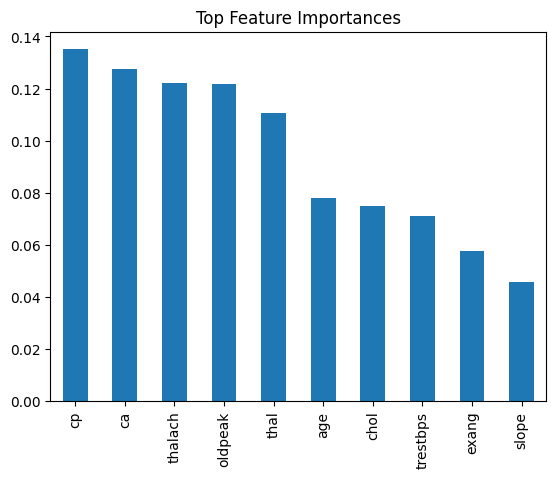

In [11]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top Feature Importances")
plt.show()


## Feature Importance

Random Forest provides feature importance scores indicating how influential each feature is in prediction.


In [12]:
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Cross Validation Accuracy:", cv_scores.mean())


Cross Validation Accuracy: 0.9970731707317073


## Cross Validation

Cross-validation provides a more reliable estimate of model performance by evaluating it across multiple folds.


## Final Conclusion

- Decision Tree provides interpretable model structure.
- Deep trees may overfit the training data.
- Random Forest improves accuracy using ensemble learning.
- Feature importance highlights key predictors of heart disease.
- Cross-validation confirms model reliability.

Tree-based models are powerful and widely used in classification problems.
